In [3]:
Pkg.add("Plots")

INFO: Package Plots is already installed
INFO: METADATA is out-of-date — you may not have the latest version of Plots
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [4]:
using Plots
using DataFrames
using CSV
using Query

In [5]:
x = 1:10; y = rand(10,2) # 2 columns means two lines
plot(x,y,title="abc")
savefig("myplot.pdf") # Saves the plot from p as a .pdf vector graphic

In [6]:
CSV.validate("output/output-without-elements.csv", delim=";", header=1)

In [7]:
data = CSV.read("output/output-without-elements.csv", delim=";", header=1)
head(data)

,Tool,View,ChangeSet,RunIndex,Iteration,PhaseName,MetricName,MetricValue
1,jastadd-ttc18-relast-emf-inc,Q1,1,0,0,Initialization,Time,183510119
2,jastadd-ttc18-relast-emf-inc,Q1,1,0,0,Initialization,Memory,7913400
3,jastadd-ttc18-relast-emf-inc,Q1,1,0,0,Load,Time,285321797
4,jastadd-ttc18-relast-emf-inc,Q1,1,0,0,Load,Memory,7428792
5,jastadd-ttc18-relast-emf-inc,Q2,1,0,0,Initialization,Time,176043764
6,jastadd-ttc18-relast-emf-inc,Q2,1,0,0,Initialization,Memory,7913448


In [8]:
data1 = @from i in data begin
        @where i.MetricName == "Time"
        @let value = i.MetricValue / 10^6
        @select {i.Tool, i.View, i.ChangeSet, i.PhaseName, i.MetricValue, Value=value}
        @collect DataFrame
end
data1[:ShortTool] = map((x) -> x[15:end], data1[:Tool])
head(data1)

,Tool,View,ChangeSet,PhaseName,MetricValue,Value,ShortTool
1,jastadd-ttc18-relast-emf-inc,Q1,1,Initialization,183510119,183.51,relast-emf-inc
2,jastadd-ttc18-relast-emf-inc,Q1,1,Load,285321797,285.322,relast-emf-inc
3,jastadd-ttc18-relast-emf-inc,Q2,1,Initialization,176043764,176.044,relast-emf-inc
4,jastadd-ttc18-relast-emf-inc,Q2,1,Load,246596896,246.597,relast-emf-inc
5,jastadd-ttc18-relast-emf-inc,Q1,2,Initialization,179378789,179.379,relast-emf-inc
6,jastadd-ttc18-relast-emf-inc,Q1,2,Load,334370109,334.37,relast-emf-inc


In [9]:
datag = by(data1, [:ShortTool, :ChangeSet, :View, :PhaseName], df -> mean(df[:Value]))
rename!(datag, :x1 => :Mean)
head(datag)

,ShortTool,ChangeSet,View,PhaseName,Mean
1,relast-emf-inc,1,Q1,Initialization,183.51
2,relast-emf-inc,1,Q1,Load,285.322
3,relast-emf-inc,1,Q2,Initialization,176.044
4,relast-emf-inc,1,Q2,Load,246.597
5,relast-emf-inc,2,Q1,Initialization,179.379
6,relast-emf-inc,2,Q1,Load,334.37


In [10]:
minY = floor(log10(minimum(data1[:Value])))
maxY = log10(maximum(data1[:Value]))
println(minY, " ", maxY)

-2.0 4.525140545608281


In [11]:
phase_names = Dict("Load" => "01-Load", "Initial" => "02-Initial", "Update" => "03-Update")

good_colors = ["#000000","#e69f00","#56b4e9","#009e73","#f0e442","#0072b2","#d55e00","#cc79a7"]
good_shapes = ["circle", "square", "triangle-down", "cross"]
good_dashes = ["dot", "solid", "dash", "dashdot", "longdash"]
# color, shape, dash-type, name in legend
diagram_info = Dict(
    "xml-inc" =>          (good_colors[1], good_shapes[1], good_dashes[1], "Incremental"),
    "xml-flush" =>        (good_colors[2], good_shapes[2], good_dashes[2], "Flushing"),
    "relast-xml-inc" =>   (good_colors[3], good_shapes[3], good_dashes[3], "Incremental (Relations)"),
    "relast-xml-flush" => (good_colors[4], good_shapes[4], good_dashes[4], "Flushing (Relations)"),
    "relast-emf-inc" =>   (good_colors[5], good_shapes[1], good_dashes[1], "Incremental (EMF)"),
    "relast-emf-flush" => (good_colors[8], good_shapes[2], good_dashes[2], "Flushing (EMF)")
)

Dict{String,NTuple{4,String}} with 6 entries:
  "relast-emf-flush" => ("#cc79a7", "square", "solid", "Flushing (EMF)")
  "xml-inc"          => ("#000000", "circle", "dot", "Incremental")
  "xml-flush"        => ("#e69f00", "square", "solid", "Flushing")
  "relast-xml-flush" => ("#009e73", "cross", "dashdot", "Flushing (Relations)")
  "relast-xml-inc"   => ("#56b4e9", "triangle-down", "dash", "Incremental (Rela…
  "relast-emf-inc"   => ("#f0e442", "circle", "dot", "Incremental (EMF)")

6×7 DataFrames.DataFrame. Omitted printing of 2 columns
│ Row │ Tool                  │ View │ ChangeSet │ PhaseName │ MetricValue │
├─────┼───────────────────────┼──────┼───────────┼───────────┼─────────────┤
│ 1   │ jastadd-ttc18-xml-inc │ Q1   │ 1         │ Load      │ 226272145   │
│ 2   │ jastadd-ttc18-xml-inc │ Q1   │ 2         │ Load      │ 231950690   │
│ 3   │ jastadd-ttc18-xml-inc │ Q1   │ 4         │ Load      │ 297598690   │
│ 4   │ jastadd-ttc18-xml-inc │ Q1   │ 8         │ Load      │ 356514376   │
│ 5   │ jastadd-ttc18-xml-inc │ Q1   │ 16        │ Load      │ 468907885   │
│ 6   │ jastadd-ttc18-xml-inc │ Q1   │ 32        │ Load      │ 597882682   │

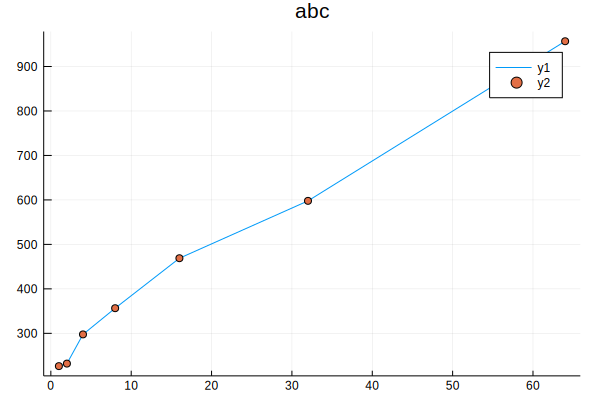

In [55]:
data2 = @from i in data1 begin
    @where i.ShortTool == "xml-inc" && i.View == "Q1" && i.PhaseName == "Load"
    @select i
    @collect DataFrame
end
print(head(data2))
plot(data2[:ChangeSet],data2[:Value],title="abc")
scatter!(data2[:ChangeSet],data2[:Value], linecolor = :red)

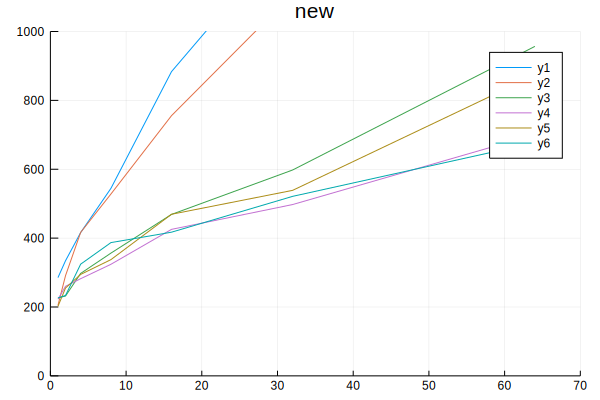

In [69]:
viewToPlot = "Q1"
phaseToPlot = "Load"
t = plot(title = "new", xlims = (0,70), ylims = (0,1000))
#[toolname for toolname = unique(datag[:ShortTool])]
datagSmall = @from i in datag begin
             @where i.View == viewToPlot && i.PhaseName == phaseToPlot
             @select i
             @collect DataFrame
end
#println(head(datagSmall))

for toolname = unique(datagSmall[:ShortTool])
    #println(toolname)
    sub = @from i in datag begin
          @where i.View == viewToPlot && i.PhaseName == phaseToPlot && i.ShortTool == toolname
          @select {i.ChangeSet, i.Mean}
          @collect DataFrame
    end
    #println(head(sub))
    plot!(sub[:ChangeSet], sub[:Mean])
    #print(typeof(sub))
end
t
#plot(x=dataP[:ChangeSet], y=dataP)